# IMDB

## introdução
---
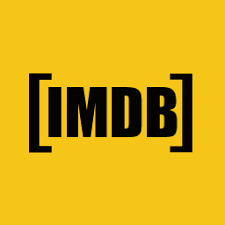

---

Os dados analisados nesse notebook foram extraidos da minha conta pessoal do [IMDB](https://tse3.mm.bing.net/th?id=OIP.NPrBTjZ5scqqgZ4ZBmkWnwHaHa&pid=Api).


## importando bibliotecas e lendo os dados

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
imdb = pd.read_csv(r'C:\Users\mateu\OneDrive\Documentos\Programação\dados\IMDB_Mateus\ratings.csv', encoding='ISO-8859-1')
#covid_BR_19 = covid_BR_19.drop(columns=['region']).copy()
imdb.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt1010048,8,2016-05-31,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
1,tt1024648,8,2017-02-07,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120.0,2012,"Biography, Drama, Thriller",554768.0,2012-08-31,Ben Affleck
2,tt0102926,9,2017-01-17,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1203676.0,1991-01-30,Jonathan Demme
3,tt0105236,9,2016-02-17,Reservoir Dogs,https://www.imdb.com/title/tt0105236/,movie,8.3,99.0,1992,"Crime, Drama, Thriller",877192.0,1992-01-21,Quentin Tarantino
4,tt1063669,7,2016-06-06,Die Welle,https://www.imdb.com/title/tt1063669/,movie,7.6,107.0,2008,"Drama, Thriller",98812.0,2008-01-18,Dennis Gansel


## Resumo e preparação dos dados

In [3]:
print(imdb.shape)
print(imdb.columns)
print(imdb.columns.size)

(338, 13)
Index(['Const', 'Your Rating', 'Date Rated', 'Title', 'URL', 'Title Type',
       'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes',
       'Release Date', 'Directors'],
      dtype='object')
13


O dataframe análisado tem 13 colunas e 338 filmes ou series registrados

| n° | Coluna | Descrição | Status |
| -- | :------------: | :------------------------------------------------------------------: | :-: |
| 1 | Const | xxxxx | ❌ |
| 2 | Your Rating | A nota que eu dei para o respectivo filme | ✔️ |
| 3 | Date Rated | Data que avaliei. Pode ser util.. | ❓ |
| 4 |Title | Titulo do filme | ✔️ |
| 5 | URL | Url do correspondente ao filme citado no imdb, Pode ser excluida para a analise | ❌ |
| 6 | Title Type | Descreve se é um filme ou uma série | ✔️ |
| 7 | Runtimes | Tempo do filme em minutos | ✔️ |
| 8 | Year | Ano de lançamento do Filme. imformação tmb aparece em 'release date' | ✔️ |
| 9 | Genres | generos associado ao filme | ✔️ |
| 10 | Num votes | Numero de votos do respectivo filme no site | ✔️ |
| 11 | release Date | Dia do lançamento | ✔️ |
| 12 | Directors | Diretor(es) do filme | ✔️ |
| 13 | IMDB Rating | media do filme | ✔️ |

In [4]:
#imdb = imdb.replace(['Date Rated', 'Title Type', 'Num Votes', 'Release Date'], ['data_nota', 'Tipo', 'Num_votes', 'Data_lancamento']) #AS colunas foram renomeadas
imdb = imdb.rename(columns={'Your Rating':'Your_Rating','Date Rated': 'data_nota', 'Runtime (mins)':'Tempo', 'Title Type': 'Tipo', 'IMDb Rating':'IMDb_Rating', 'Num Votes':'Num_votes', 'Release Date':'Data_lancamento'}) #AS colunas foram renomeadas
imdb = imdb.loc[imdb['Tipo'] == 'movie']
imdb = imdb.drop(columns=['Const', 'URL', 'Tipo'])   # As colunas foram excluidas
imdb.head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120.0,2012,"Biography, Drama, Thriller",554768.0,2012-08-31,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118.0,1991,"Crime, Drama, Thriller",1203676.0,1991-01-30,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99.0,1992,"Crime, Drama, Thriller",877192.0,1992-01-21,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107.0,2008,"Drama, Thriller",98812.0,2008-01-18,Dennis Gansel


Pronto, agora todos os dados do dataframe 'imdb' são filmes

## 1ª análise
A primeira será feita para responder algumas perguntas simples, como:
1. Quantos filmes no total eu avaliei?
2. Quais os filmes em que eu dei rating maximo(10)?
3. Quais os filmes com os 5 maiores ratings do imdb que eu assiti?
4. Quais os filmes mais populares (mais ratings) que eu assiti?
5. Qual o filme mais antigo e mais recente que eu assiti?
6. Qual o genero que mais assiti?
7. Quantos diretores diferentes dirigiram os 'N' filmes que eu vi? Qual o diretor mais visto?

### 1 - Numero de filmes
Já que cada linha representa um filme, basta verificar quantas linhas possui o dataframe

In [13]:
print(len(imdb))
print('-='*15)
print(imdb.shape)
print('-='*15)
print(imdb.count())

296
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
(296, 10)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Your_Rating        296
data_nota          296
Title              296
IMDb_Rating        295
Tempo              296
Year               296
Genres             296
Num_votes          295
Data_lancamento    295
Directors          296
dtype: int64


Temos então a resposta a primeir pergunta: Foram avaliados um total de **296** filmes

### 2 - Filmes que eu dei 10 estrelas
Será usado o metodo loc para determinar os filmes

In [15]:
len(imdb.loc[(imdb.Your_Rating == 10)])

23

Foram 23 filmes avaliados com nota máxima

In [29]:
#print(imdb.loc[(imdb.Your_Rating == 10)])
filmes_10 = []
for t in imdb.loc[(imdb.Your_Rating == 10)]['Title']:
    filmes_10.append(t)

print(filmes_10)
print(len(filmes_10))
#imdb.loc[(imdb.Your_Rating == 10)]['Title']

["Schindler's List", 'Forrest Gump', 'Pulp Fiction', 'Se7en', 'Tarzan', 'Fight Club', 'Mad Max: Fury Road', 'Memento', 'About Time', 'Star Wars: Episode VIII - The Last Jedi', 'Arrival', 'Whiplash', 'Cidade de Deus', 'The Hateful Eight', 'La La Land', "Singin' in the Rain", '12 Angry Men', 'The Edge of Democracy', '2001: A Space Odyssey', 'Bingo: O Rei das Manhãs', 'Gisaengchung', 'The Godfather', '1917']
23


### 3 - 5 maiores medias do Imdb
será usado o metod sort_values

In [33]:
imdb.sort_values(by=['IMDb_Rating']).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
146,2,2019-10-12,Cinderela Baiana,2.0,85.0,1998,"Comedy, Drama, Family, Music, Romance",337.0,NaN,Conrado Sanchez
55,6,2017-04-12,Fantastic Four,4.3,100.0,2015,"Action, Adventure, Drama, Sci-Fi",145479.0,2015-08-04,Josh Trank
192,5,2018-07-22,Racing Stripes,5.2,102.0,2005,"Adventure, Comedy, Drama, Family, Sport",15372.0,2005-01-06,Frederik Du Chau
236,7,2017-11-29,Unaccompanied Minors,5.3,90.0,2006,"Adventure, Comedy, Family, Romance",10109.0,2006-11-30,Paul Feig
63,4,2016-02-16,Trespass,5.3,91.0,2011,"Crime, Drama, Thriller",40576.0,2011-09-14,Joel Schumacher


Acima podemos ver os 5 piores

In [36]:
imdb.sort_values(by=['IMDb_Rating'], ascending=False).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
289,9,2016-02-16,The Godfather: Part II,9.0,202.0,1974,"Crime, Drama",1070987.0,1974-12-12,Francis Ford Coppola
244,10,2016-02-16,12 Angry Men,8.9,96.0,1957,Drama,648721.0,1957-04-10,Sidney Lumet


Agora, podemos ver os 5 melhores: 
- Um sonho de liberdade
- O Poderoso Chefão
- Cavaleiro da trevas
- poderoso chefão 2
- 12 homens e uma sentença

Mas não termina ai. Quando se analisa os proximos da lista, podemos ver que eles tem a mesma nota, e qu o filme 12 homens e uma sentença aparece ali por conta da ordem alfabética.
Por isso, o segundo critério adotado será a popularidade.

In [38]:
imdb.sort_values(by=['IMDb_Rating', 'Num_votes'], ascending=False).head(10)

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
289,9,2016-02-16,The Godfather: Part II,9.0,202.0,1974,"Crime, Drama",1070987.0,1974-12-12,Francis Ford Coppola
12,10,2016-02-16,Pulp Fiction,8.9,154.0,1994,"Crime, Drama",1741967.0,1994-05-21,Quentin Tarantino
61,9,2016-02-16,The Lord of the Rings: The Return of the King,8.9,201.0,2003,"Adventure, Drama, Fantasy",1573856.0,2003-12-01,Peter Jackson
7,10,2016-02-16,Schindler's List,8.9,195.0,1993,"Biography, Drama, History",1156579.0,1993-11-30,Steven Spielberg
244,10,2016-02-16,12 Angry Men,8.9,96.0,1957,Drama,648721.0,1957-04-10,Sidney Lumet
257,9,2017-03-23,O.J.: Made in America,8.9,467.0,2016,"Documentary, Biography, Crime, History",16199.0,2016-01-22,Ezra Edelman
45,9,2016-02-16,Inception,8.8,148.0,2010,"Action, Adventure, Sci-Fi, Thriller",1946703.0,2010-07-08,Christopher Nolan


### 4 - Mais populares
Da mesma forma que no item anterior podemos descobrir os filmes mais populares

In [43]:
imdb.sort_values(by=['Num_votes'], ascending=False).head(10)

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
45,9,2016-02-16,Inception,8.8,148.0,2010,"Action, Adventure, Sci-Fi, Thriller",1946703.0,2010-07-08,Christopher Nolan
44,10,2016-02-16,Fight Club,8.8,139.0,1999,Drama,1770043.0,1999-09-10,David Fincher
12,10,2016-02-16,Pulp Fiction,8.9,154.0,1994,"Crime, Drama",1741967.0,1994-05-21,Quentin Tarantino
8,10,2016-02-16,Forrest Gump,8.8,142.0,1994,"Drama, Romance",1712858.0,1994-06-23,Robert Zemeckis
41,9,2016-02-16,The Matrix,8.7,136.0,1999,"Action, Sci-Fi",1595666.0,1999-03-24,"Lilly Wachowski, Lana Wachowski"
29,8,2016-02-16,The Lord of the Rings: The Fellowship of the Ring,8.8,178.0,2001,"Action, Adventure, Drama, Fantasy",1586371.0,2001-12-10,Peter Jackson
61,9,2016-02-16,The Lord of the Rings: The Return of the King,8.9,201.0,2003,"Adventure, Drama, Fantasy",1573856.0,2003-12-01,Peter Jackson
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola


In [45]:
imdb.sort_values(by=['Num_votes']).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
86,7,2017-04-03,"Carne, Osso",8.6,66.0,2011,"Documentary, Drama, News",18.0,2011-03-31,"Carlos Juliano Barros, Caio Cavechini"
206,8,2017-10-18,A Lei da Água (Novo Código Florestal),8.8,78.0,2015,"Documentary, History",36.0,2015-03-31,André D'Elia
43,7,2017-01-28,Cassiopéia,6.8,80.0,1996,"Family, Adventure, Animation, Sci-Fi",187.0,1996-06-23,Clóvis Vieira
112,7,2017-12-05,La Vingança,6.4,90.0,2016,Comedy,197.0,2016-10-07,Fernando Fraiha
146,2,2019-10-12,Cinderela Baiana,2.0,85.0,1998,"Comedy, Drama, Family, Music, Romance",337.0,NaN,Conrado Sanchez


### 5 Mais antigo e mais recente

In [52]:
imdb.sort_values(by=['Data_lancamento'], ascending=True).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
123,6,2020-03-21,Star Wars: Episode IX - The Rise of Skywalker,6.7,142.0,2019,"Action, Adventure, Fantasy, Sci-Fi",298615.0,2019-12-16,J.J. Abrams
164,8,2020-02-02,Little Women,7.9,135.0,2019,"Drama, Romance",91677.0,2019-12-07,Greta Gerwig
318,10,2020-02-08,1917,8.4,119.0,2019,"Drama, War",277446.0,2019-12-04,Sam Mendes
39,8,2020-01-22,The Irishman,7.9,209.0,2019,"Biography, Crime, Drama",275415.0,2019-09-27,Martin Scorsese
129,9,2020-01-16,Jojo Rabbit,7.9,108.0,2019,"Comedy, Drama, War",192181.0,2019-09-08,Taika Waititi


In [53]:
imdb.sort_values(by=['Data_lancamento'], ascending=False).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
123,6,2020-03-21,Star Wars: Episode IX - The Rise of Skywalker,6.7,142.0,2019,"Action, Adventure, Fantasy, Sci-Fi",298615.0,2019-12-16,J.J. Abrams
164,8,2020-02-02,Little Women,7.9,135.0,2019,"Drama, Romance",91677.0,2019-12-07,Greta Gerwig
318,10,2020-02-08,1917,8.4,119.0,2019,"Drama, War",277446.0,2019-12-04,Sam Mendes
39,8,2020-01-22,The Irishman,7.9,209.0,2019,"Biography, Crime, Drama",275415.0,2019-09-27,Martin Scorsese
129,9,2020-01-16,Jojo Rabbit,7.9,108.0,2019,"Comedy, Drama, War",192181.0,2019-09-08,Taika Waititi


Vemos dois filmes do ano de 1940: O grande ditador de charles Chaplin e Fantasia da Disney
Os filmes mais recentes foram lançados em 2019

#### Desafio
como desafio separarei os filmes do mes de fevereiro(02) e de anos pares hahaha

In [60]:
print(imdb.Data_lancamento.dtypes)
imdb['Data_lancamento'] = pd.to_datetime(imdb.Data_lancamento)
print(imdb.Data_lancamento.dtypes)

datetime64[ns]
datetime64[ns]


In [61]:
imdb.loc[imdb.Data_lancamento.dt.month == 2]

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
18,7,2017-01-25,Trainspotting,8.1,93.0,1996,Drama,613242.0,1996-02-23,Danny Boyle
141,8,2018-04-14,Annihilation,6.9,115.0,2018,"Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...",259311.0,2018-02-13,Alex Garland
153,8,2016-04-19,Zootopia,8.0,108.0,2016,"Animation, Adventure, Comedy, Crime, Family, M...",409972.0,2016-02-11,"Rich Moore, Jared Bush, Byron Howard"
166,8,2017-04-29,Logan,8.1,137.0,2017,"Action, Drama, Sci-Fi, Thriller",609034.0,2017-02-17,James Mangold
174,8,2016-09-14,50 First Dates,6.8,99.0,2004,"Comedy, Drama, Romance",315063.0,2004-02-03,Peter Segal
189,7,2017-08-04,Kong: Skull Island,6.6,118.0,2017,"Action, Adventure, Fantasy, Sci-Fi",255648.0,2017-02-28,Jordan Vogt-Roberts
196,6,2017-04-05,Taegukgi hwinalrimyeo,8.1,140.0,2004,"Action, Drama, War",36746.0,2004-02-03,Je-kyu Kang
252,8,2017-01-09,Det sjunde inseglet,8.2,96.0,1957,"Drama, Fantasy",153610.0,1957-02-16,Ingmar Bergman
253,7,2019-02-02,Isle of Dogs,7.9,101.0,2018,"Animation, Adventure, Comedy, Drama, Fantasy, ...",126213.0,2018-02-15,Wes Anderson
297,8,2016-02-17,Taxi Driver,8.3,114.0,1976,"Crime, Drama",683952.0,1976-02-08,Martin Scorsese


Acima podemos ver os filmes q foram lançado no mês de fevereiro

In [62]:
imdb.loc[(imdb.Data_lancamento.dt.month == 2) & ((imdb.Data_lancamento.dt.year % 2)==0)]

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
18,7,2017-01-25,Trainspotting,8.1,93.0,1996,Drama,613242.0,1996-02-23,Danny Boyle
141,8,2018-04-14,Annihilation,6.9,115.0,2018,"Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...",259311.0,2018-02-13,Alex Garland
153,8,2016-04-19,Zootopia,8.0,108.0,2016,"Animation, Adventure, Comedy, Crime, Family, M...",409972.0,2016-02-11,"Rich Moore, Jared Bush, Byron Howard"
174,8,2016-09-14,50 First Dates,6.8,99.0,2004,"Comedy, Drama, Romance",315063.0,2004-02-03,Peter Segal
196,6,2017-04-05,Taegukgi hwinalrimyeo,8.1,140.0,2004,"Action, Drama, War",36746.0,2004-02-03,Je-kyu Kang
253,7,2019-02-02,Isle of Dogs,7.9,101.0,2018,"Animation, Adventure, Comedy, Drama, Fantasy, ...",126213.0,2018-02-15,Wes Anderson
297,8,2016-02-17,Taxi Driver,8.3,114.0,1976,"Crime, Drama",683952.0,1976-02-08,Martin Scorsese


### 6 Genero mais assitido

## Teste

In [6]:
#imdb.rename(columns={'Date Rated': 'data_nota', 'Title Type': 'Tipo', 'Num Votes':'Num_votes', 'Release Date':'Data_lancamento'}) #AS colunas foram renomeadas

## fazer
- <s>não consegui alterar o nome na coluna</s>